***Library***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install nltk

In [ ]:
pip install Sastrawi

     |████████████████████████████████| 209 kB 5.0 MB/s 


In [ ]:
pip install wordcloud

In [ ]:
#Import
import tweepy
import json
import csv
import re
import string
import random
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#From
from time import time
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from collections import Counter
from matplotlib.patches import Patch
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud
from wordcloud import WordCloud,ImageColorGenerator

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

***End Of Library***


---



**Pengambilan Data Twitter**

In [ ]:
consumer_key = '5mcOMaZxyoFZQRU9w6AtK2XMs'
consumer_secret = 'k6tyTpGzBQVaWZhBVspbWE9j3c8rv2IS4veVxtQywuQ5eezBSE'
access_token = '1430511379044200452-Ux1V9CgTOBYC86u1TeNJAVwHZegKi0'
access_token_secret = 'GFrIaysjMysQBEQPwtECpbfKPFNONWt5tke1lhdeJt3wc'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# Untuk Mengambil data Twitter
tweety = tweepy.Cursor(api.search,q="#ppkm OR #ppkmlevel3",count=100,lang="id",since="2021-09-03",until='2021-09-10',tweet_mode="extended").items()

In [ ]:
# Data = pd.DataFrame(lists)
# Data.columns = ['Data Tweet']
# Data

In [ ]:
# Data.to_csv("08September-15September2021.csv", index=False)

In [ ]:
# # # Data Yang Sudah Disimpan
# Data1 = pd.read_csv('/content/sample_data/22-29Agustus2021.csv')
# Data2 = pd.read_csv('/content/sample_data/30Agustus-07September2021.csv')
# Data3 = pd.read_csv('/content/sample_data/08September-15September2021.csv')
# Data4 = pd.read_csv('/content/sample_data/16September-22September2021.csv')
# # # Data (untuk menampilkan data)
# # # Sama seperti data awal masuk ke dalam dataframe

**REGULAR EXPRETION**

In [ ]:
# def regex_func(dataTw):
#   dataRegex = []
#   for datax in range(0, len(dataTw)):
#     text = dataTw.iloc[datax, 0]
#     regex = text
#     regex = re.sub(r'http\S+', '', regex)
#     regex = re.sub('@[^\s]+', '', regex)
#     regex = re.sub(r'#[^\s]+', '', regex)
#     regex = regex.encode("ascii", "ignore")
#     regex = regex.decode()
#     regex = re.sub('\s+',' ', regex)
#     mark_list_word = regex.split()
#     if len(mark_list_word) > 10:
#       dataRegex.append(regex)
  
#   return dataRegex

In [ ]:
# Data1_reg = regex_func(Data1)
# Data2_reg = regex_func(Data2)
# Data3_reg = regex_func(Data3)
# Data4_reg = regex_func(Data4)

**DELETE DOUBLE DATA**

In [ ]:
# def check_double_data(datax):
#   DeleteDoubleData = pd.DataFrame(datax)
#   DeleteDoubleData.columns = ['Data Tweet']
#   Data_Fix = DeleteDoubleData.drop_duplicates()
#   return Data_Fix

In [ ]:
# check_data1 = check_double_data(Data1_reg)
# check_data2 = check_double_data(Data2_reg)
# check_data3 = check_double_data(Data3_reg)
# check_data4 = check_double_data(Data4_reg)


**GET 250 DATA PER DATA MINGGUAN**

In [ ]:
# def get_250data(datax):
#   get_data = datax.sample(n=250)
#   return  get_data

In [ ]:
# datafix1 = get_250data(check_data1)
# datafix2 = get_250data(check_data2)
# datafix3 = get_250data(check_data3)
# datafix4 = get_250data(check_data4)

In [ ]:
# dataFixAll = pd.DataFrame(columns=['Data Tweet'])

In [ ]:
# dataFixAll = pd.concat([dataFixAll, datafix1, datafix2, datafix3, datafix4], axis=0)
# dataFixAll

In [ ]:
# file_name = 'DataSkripsi.xlsx'
  
# # saving the excel
# dataFixAll.to_excel(file_name)
# print('DataFrame is written to Excel File successfully.')

***PreProcessing***

In [ ]:
#Read Data Yang Sudah Dilabeli Oleh Pakar
DataLabel = pd.read_excel('/content/drive/MyDrive/Skripsi/DataSkripsi.xlsx')
df =  pd.DataFrame(DataLabel, columns=['Label', 'Data Tweet'])

In [ ]:
#Isi Data : Label Negatif, Netral Dan Positif
def getLabel(dataTweet):
  labels = []
  for data in range(0, len(dataTweet)):
    label = dataTweet.iloc[data, 0] #Ambil Kolom Label
    labels.append(label)

  return labels

In [ ]:
#Isi Data : Label Negatif dan Positif
def getLabelConvertToPositif(dataTweet):
  labels = []
  for data in range(0, len(dataTweet)):
    label = dataTweet.iloc[data, 0] #Ambil Kolom Label
    if label == 0:
      label = 1
    labels.append(label)

  return labels

In [ ]:
def caseFolding(dataTweet):
  case_folding_text = []
  for data in range(0, len(dataTweet)):
    text = dataTweet.iloc[data, 1] #Ambil Kolom Data Tweet
    lower_text = text.lower()
    case_folding_text.append(lower_text)
  
  DF_CaseFolding = pd.DataFrame(case_folding_text)
  DF_CaseFolding.columns = ['Data Tweet']
  return DF_CaseFolding

In [ ]:
def tokenisasi(dataTweet):
  token = []
  for data in range(0, len(dataTweet)):
    lowercase = dataTweet.iloc[data, 0]
    lowercase = re.sub(r"\d", "", lowercase)
    lowercase = re.sub( r'\b\w{1,3}\b', "", lowercase)
    lowercase = lowercase.translate(str.maketrans("","",string.punctuation))
    lowercase = lowercase.strip()
    tokens = nltk.tokenize.word_tokenize(lowercase)
    token.append(tokens)

  return token

In [ ]:
def stopword(dataTweet):
  data_stopword = []
  list_stopwords = set(stopwords.words('indonesian'))
  for line in range(0, len(dataTweet)):
    data = dataTweet[line]
    tokens_without_stopword = [word for word in data 
                               if not word in list_stopwords]
    data_stopword.append(tokens_without_stopword)

  return data_stopword

In [ ]:
def stemming(dataTweet):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  stemming_data = []

  for data3 in range(0, len(dataTweet)):
    list_tokens = dataTweet[data3]
    output = [(stemmer.stem(token)) for token in list_tokens]
    stemming_data.append(output)
  
  return stemming_data

In [ ]:
def preProcessing(datax):
  datax = caseFolding(datax)
  datax = tokenisasi(datax)
  datax = stopword(datax)
  datax = stemming(datax)

  return datax

In [ ]:
def getLenStemming(datax):
  lenStem = []
  for data in range(0, len(datax)):
    lenStem.append(len(datax[data]))

  return lenStem

In [ ]:
#Mengembalikan kata menjadi kalimat setelah proses Stemming
def backWord(data):
  allWords = []
  for datax in range(0, len(data)):
    listword = data[datax]
    newWord = ' '.join(listword)
    allWords.append(newWord)
  
  return allWords

In [ ]:
#Label Berisikan Data Negatif, Netral dan Positif
label = getLabel(df)

#Label Berisikan Data Negatif dan Positif
label2 = getLabelConvertToPositif(df)

#Keseluruhan Tahap PreProcessing
TweetFix = preProcessing(df)

#Mengambil Panjang Kata Setiap Tweet
lenDataStem = getLenStemming(TweetFix)

***End Of PreProcessing***


---



***Weight TF-IDF***

In [ ]:
def tf_idf(data):
  data_recall = []
  global term_data
  for recall in range(0, len(data)):
    rec = data[recall]
    data_recall.append(" ". join(rec))
  
  vectorizer = TfidfVectorizer()
  X = vectorizer.fit_transform(data_recall)
  tf_idf_token = vectorizer.get_feature_names_out()
  term_data = vectorizer.get_feature_names_out()

  #Buat Data Frame
  # df_tfidfvect = pd.DataFrame(data=X.toarray(), index=DataStem, columns=tf_idf_token)
  df_tfidfvect = pd.DataFrame(data=X.toarray(), columns=tf_idf_token)
  return df_tfidfvect

In [ ]:
data_TFIDF = tf_idf(TweetFix)
data_TFIDF

,aamiin,abai,abang,abiansemal,abis,abisabiz,abisss,abrik,aceh,achmad,ada,adakan,adaptasi,adapter,adil,adisasmito,admin,admintoto,adopsi,adu,again,agam,agama,agen,aglomerasi,agung,agustus,ahfandi,ahhh,ahli,ahmad,ahok,airlangga,ajak,ajang,ajar,akhmad,akibat,akses,aksi,...,wifi,wiku,wilayah,wilkum,wilkun,wings,wiraraja,wisata,wisatawan,wisatayang,wisma,wita,wkwkwkwk,wmembuat,wonge,wonogiri,woro,worry,wrapnya,wuffyland,wuffymin,wujud,xiaomi,xjam,yaaa,yahh,yeay,yogyakarta,yokk,your,youtube,yukk,yustisi,yuuk,ziarah,zica,ziplock,zipmex,zipster,zona
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.150042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.214610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Export Data Dalam Bentuk Excel Untuk Labeling
file_name = 'DataTF-IDF.xlsx'
  
# saving the excel
data_TFIDF.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


***End Of Weight TF-IDF***


---



***Algoritma Naive Bayes***

**Data Negatif, Netral dan Positif**

In [ ]:
#NNP = Negatif, Netral dan Positif
DataStem_NNP = pd.DataFrame({
    "Label" : label,
    "Data Tweet" : backWord(TweetFix),
    "Len Data" : lenDataStem
})
DataStem_NNP

,Label,Data Tweet,Len Data
0,-1,barusan jemput udah buka sampe,5
1,1,sekat jalur pilar kota pasuruan sekat jalur wi...,19
2,1,tinggi antusiasme masyarakat ppkm imbang antis...,9
3,0,rincian syarat kapal laut pelni atur terbang b...,11
4,1,jaga sehat level ppkm turun pandemi,6
...,...,...,...
995,-1,wali kota bogor bima arya terap wajib sertifik...,13
996,1,tenang porsi hidup mewah indah,5
997,1,selamat nikmat minggu suasana sabar masa pandemi,7
998,1,pindah pasien isoman isoter pantau forkipimda ...,14


In [ ]:
positif_NNP = DataStem_NNP[DataStem_NNP['Label'] == 1]['Data Tweet'].count()
negatif_NNP = DataStem_NNP[DataStem_NNP['Label'] == -1]['Data Tweet'].count()
netral_NNP = DataStem_NNP[DataStem_NNP['Label'] == 0]['Data Tweet'].count()

print('Perbandingan Data')
print('Positif : ' + str(positif_NNP))
print('Negatif : ' + str(negatif_NNP))
print('Netral  : ' + str(netral_NNP))
print('Total   : ' + str(positif_NNP + negatif_NNP + netral_NNP))

Perbandingan Data
Positif : 553
Negatif : 228
Netral  : 219
Total   : 1000


*Gaussian Distribution*

In [ ]:
X_train_NNP, X_test_NNP, y_train_NNP, y_test_NNP = train_test_split(data_TFIDF, label, test_size=0.3, random_state=606) 
# 70% training and 30% testing

In [ ]:
gnb_NNP = GaussianNB()
gnb_NNP.fit(X_train_NNP, y_train_NNP)
y_pred_NNP = gnb_NNP.predict(X_test_NNP)

In [ ]:
mean_NNP = pd.DataFrame(gnb_NNP.theta_).T #Mean
new_mean = pd.DataFrame(mean_NNP.iloc[2748,:])
new_mean

,2748
0,0.001605
1,0.005507
2,0.004336


In [ ]:
#Standar Deviasi
std_NNP = pd.DataFrame(gnb_NNP.sigma_).T
new_std = pd.DataFrame(std_NNP.iloc[2748,:])
new_std

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


,2748
0,0.000422
1,0.002254
2,0.001237


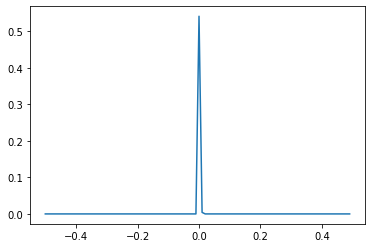

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-0.5, 0.5, 0.01)

plt.plot(x_axis, norm.pdf(x_axis, round(new_mean.iloc[2], 4), round(new_std.iloc[2], 4)))
plt.show()

In [ ]:
## Cek data Masuk ke label Negatif/Netral/Positif 
# gnb_NNP.predict_proba(np.array([X_train_NNP.iloc[7, :]]))

In [ ]:
## Print Salah Satu Label Train pada index
# y_train_NNP[7]

In [ ]:
## Cek Seluruh Label Train 
# y_train_NNP

In [ ]:
# predict the new document from the testing dataset
t = time()
test_time_NNP = time() - t
print("test time:  %0.3fs" % test_time_NNP)

# compute the performance measures
score_NNP = metrics.accuracy_score(y_test_NNP, y_pred_NNP)
print("accuracy:   %0.3f" % score_NNP)
print(metrics.classification_report(y_test_NNP, y_pred_NNP))
# print(metrics.classification_report(y_test_NNP, y_pred_NNP,
#                                             target_names=['Positif', 'Negatif', 'Netral']))
print("confusion matrix:")
print(metrics.confusion_matrix(y_test_NNP, y_pred_NNP))
print('------------------------------')

test time:  0.000s
accuracy:   0.660
              precision    recall  f1-score   support

          -1       0.52      0.54      0.53        63
           0       0.63      0.54      0.58        69
           1       0.73      0.76      0.74       168

    accuracy                           0.66       300
   macro avg       0.62      0.61      0.62       300
weighted avg       0.66      0.66      0.66       300

confusion matrix:
[[ 34   6  23]
 [  7  37  25]
 [ 25  16 127]]
------------------------------


In [ ]:
#Cross Validation For Gaussian Distribution
scores_acc_NNP = cross_val_score(gnb_NNP, X_train_NNP, y_train_NNP, cv=5, scoring="accuracy")
scores_acc_NNP

array([0.59285714, 0.55      , 0.58571429, 0.48571429, 0.56428571])

In [ ]:
#Mean And Std For Gaussian Distribution
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_acc_NNP.mean(), scores_acc_NNP.std()))

0.56 accuracy with a standard deviation of 0.04


***Cross Validation (Data Per Iterasi)***

In [ ]:
def persenData_NNP(datax):
  frame = pd.DataFrame(datax)
  rows, cols = [len(frame), len(frame.values[1])]
  labels_data = [] 
  for i in range(0, len(frame)):
    data_jum = len(frame.values[i])
    col = {
        "positif" : 0,
        "negatif" : 0,
        "netral"  : 0,
    }
    positif = []
    negatif = []
    netral = []
    for j in range(0, data_jum):
      nilai_data = frame.values[i,j]
      angka = all_y_NNP[nilai_data]
      if angka == 1:
        positif.append(angka)
      elif angka == -1:
        negatif.append(angka)
      elif angka == 0:
        netral.append(angka)
    total_positif = len(positif)
    total_negatif = len(negatif)
    total_netral = len(netral)
      
    col["positif"] = total_positif/data_jum * 100
    col["negatif"] = total_negatif/data_jum * 100 
    col["netral"] = total_netral/data_jum * 100 
    labels_data.append(col)
  return labels_data

In [ ]:
def getData_Tweet_NNP(Sample_data, data_drop):
  main_data = Sample_data
  drop_data = data_drop
  tmp_all = []

  for i in range(0, len(drop_data)):
    # tmp = main_data.drop(drop_data[i])
    tmp = main_data.loc[drop_data[i], :]
    tmp_all.append(tmp)
  
  return tmp_all

In [ ]:
def getData_Label_NNP(datax):
  tmp_frame = pd.DataFrame(datax)
  frame = tmp_frame.fillna(0)
  labels_data = [] 
  for i in range(0, len(frame)):
    data_jum = len(frame.values[i])
    tmp_label = []
    for j in range(0, data_jum):
      nilai_data = int(frame.values[i,j])
      angka = all_y_NNP[nilai_data]
      tmp_label.append(angka)
      
    labels_data.append(tmp_label)
  return labels_data

  #Done Berhasil Return Index Data Menjadi Label

In [ ]:
all_X_NNP = data_TFIDF
all_y_NNP = label

In [ ]:
kf_NNP = KFold(n_splits=5)
kf_NNP.get_n_splits(all_X_NNP)
print(kf_NNP)

KFold(n_splits=5, random_state=None, shuffle=False)


In [ ]:
scores_crossval_NNP = cross_val_score(gnb_NNP, all_X_NNP, all_y_NNP, cv=kf_NNP,scoring="accuracy")
scores_crossval_NNP

array([0.555, 0.63 , 0.6  , 0.565, 0.585])

In [ ]:
scores_crossval_NNP.mean()

0.587

In [ ]:
train_data_NNP = []
test_data_NNP = []
for train_index_NNP, test_index_NNP in kf_NNP.split(all_X_NNP):
  # print("TRAIN : ", train_index, "TEST: ", test_index)
  train_data_NNP.append(train_index_NNP)
  test_data_NNP.append(test_index_NNP)

In [ ]:
tmp_train_NNP = pd.DataFrame(train_data_NNP)
train_NNP = tmp_train_NNP.fillna(0)
train_NNP = train_NNP.astype(int)
train_NNP

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799
0,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799


In [ ]:
tmp_test_NNP = pd.DataFrame(test_data_NNP)
test_NNP = tmp_test_NNP.fillna(0)
test_NNP = test_NNP.astype(int)
test_NNP

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
1,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
2,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
3,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,...,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799
4,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999


In [ ]:
label_train_NNP = getData_Label_NNP(train_NNP)
label_test_NNP = getData_Label_NNP(test_NNP)

In [ ]:
DataBaru_train_NNP = getData_Tweet_NNP(all_X_NNP, train_NNP.to_numpy())
DataBaru_test_NNP = getData_Tweet_NNP(all_X_NNP, test_NNP.to_numpy())

In [ ]:
# X = Model Y = label
for i in range(0,5):
  gnb_NNP = GaussianNB()
  gnb_NNP.fit(DataBaru_train_NNP[i], label_train_NNP[i])
  y_pred_NNP = gnb_NNP.predict(DataBaru_test_NNP[i])

  print("Data ke-" + str(i))
  # predict the new document from the testing dataset
  t = time()
  test_time_NNP = time() - t
  print("test time:  %0.3fs" % test_time_NNP)

  # compute the performance measures
  score_NNP = metrics.accuracy_score(label_test_NNP[i], y_pred_NNP)
  print("accuracy:   %0.3f" % score_NNP)
  print(metrics.classification_report(label_test_NNP[i], y_pred_NNP))
  # print(metrics.classification_report(label_test_NNP[i], y_pred_NNP,
  #                                             target_names=['Positif', 'Negatif', 'Netral']))
  print("confusion matrix:")
  print(metrics.confusion_matrix(label_test_NNP[i], y_pred_NNP))
  print('------------------------------')

Data ke-0
test time:  0.000s
accuracy:   0.555
              precision    recall  f1-score   support

          -1       0.45      0.49      0.47        53
           0       0.52      0.33      0.40        43
           1       0.62      0.68      0.65       104

    accuracy                           0.56       200
   macro avg       0.53      0.50      0.51       200
weighted avg       0.55      0.56      0.55       200

confusion matrix:
[[26  5 22]
 [ 7 14 22]
 [25  8 71]]
------------------------------
Data ke-1
test time:  0.000s
accuracy:   0.630
              precision    recall  f1-score   support

          -1       0.43      0.50      0.47        40
           0       0.50      0.46      0.48        41
           1       0.75      0.73      0.74       119

    accuracy                           0.63       200
   macro avg       0.56      0.56      0.56       200
weighted avg       0.64      0.63      0.63       200

confusion matrix:
[[20  5 15]
 [ 8 19 14]
 [18 14 87]]
---

In [ ]:
persen_train_NNP = persenData_NNP(train_data_NNP)
persen_test_NNP = persenData_NNP(test_data_NNP)

In [ ]:
train_df_NNP = pd.DataFrame(persen_train_NNP)
test_df_NNP = pd.DataFrame(persen_test_NNP)

df_concat_NNP = pd.concat((train_df_NNP, test_df_NNP))

by_row_index_NNP = df_concat_NNP.groupby(df_concat_NNP.index)
df_means_NNP = by_row_index_NNP.mean()
df_means_NNP.head()

,positif,negatif,netral
0,54.0625,24.1875,21.7500
1,56.8750,21.7500,21.3750
2,56.8750,19.6875,23.4375
3,55.7500,19.6875,24.5625
4,52.9375,28.6875,18.3750


**End Of Data Negatif, Netral, Positif**


---



**Data Negatif Dan Positif**

In [ ]:
# NP = Negatif Dan Positif
DataStem_NP = pd.DataFrame({
    "Label" : label2,
    "Data Tweet" : backWord(TweetFix),
    "Len Data" : lenDataStem
})
DataStem_NP

,Label,Data Tweet,Len Data
0,-1,barusan jemput udah buka sampe,5
1,1,sekat jalur pilar kota pasuruan sekat jalur wi...,19
2,1,tinggi antusiasme masyarakat ppkm imbang antis...,9
3,1,rincian syarat kapal laut pelni atur terbang b...,11
4,1,jaga sehat level ppkm turun pandemi,6
...,...,...,...
995,-1,wali kota bogor bima arya terap wajib sertifik...,13
996,1,tenang porsi hidup mewah indah,5
997,1,selamat nikmat minggu suasana sabar masa pandemi,7
998,1,pindah pasien isoman isoter pantau forkipimda ...,14


In [ ]:
positif_NP = DataStem_NP[DataStem_NP['Label'] == 1]['Data Tweet'].count()
negatif_NP = DataStem_NP[DataStem_NP['Label'] == -1]['Data Tweet'].count()

print('Perbandingan Data')
print('Positif : ' + str(positif_NP))
print('Negatif : ' + str(negatif_NP))
print('Total   : ' + str(positif_NP + negatif_NP))

Perbandingan Data
Positif : 772
Negatif : 228
Total   : 1000


*Gaussian Distribution*

In [ ]:
X_train_NP, X_test_NP, y_train_NP, y_test_NP = train_test_split(data_TFIDF, label2, test_size=0.3, random_state=606) 
# 70% training and 30% testing

In [ ]:
gnb_NP = GaussianNB()
gnb_NP.fit(X_train_NP, y_train_NP)
y_pred_NP = gnb_NP.predict(X_test_NP)

In [ ]:
#Mean
mean_NP = pd.DataFrame(gnb_NP.theta_).T
mean_NP

,0,1
0,0.000000,0.000698
1,0.001687,0.001576
2,0.000000,0.000000
3,0.000000,0.000477
4,0.002415,0.000409
...,...,...
2744,0.000000,0.000000
2745,0.000000,0.000579
2746,0.000000,0.000579
2747,0.000000,0.000579


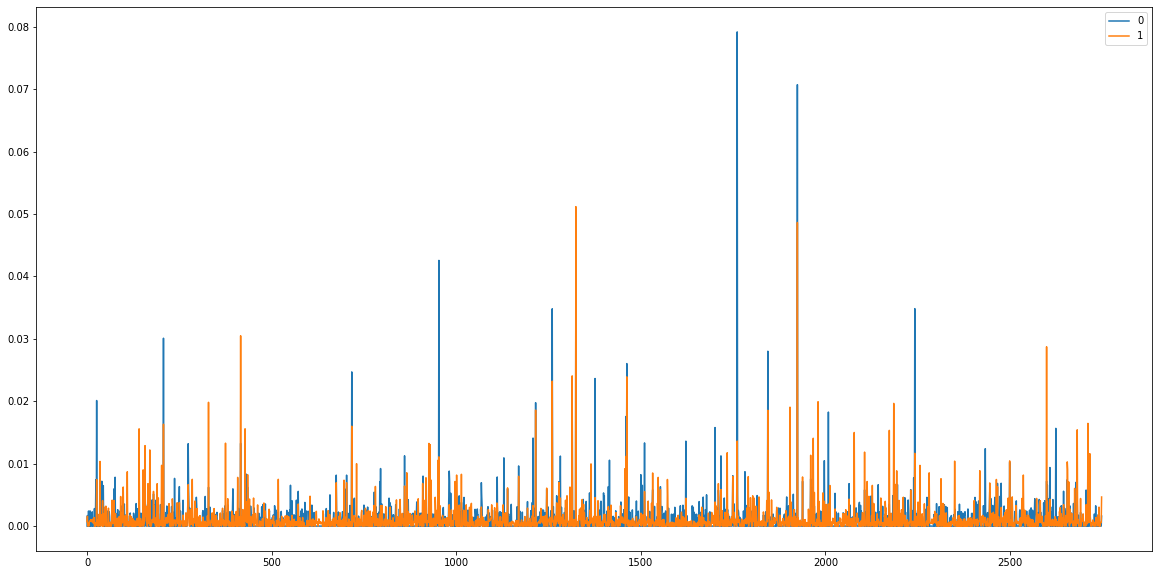

In [ ]:
mean_NP.plot(kind="line", figsize=(20,10))

In [ ]:
#Standar Deviasi
std_NP = pd.DataFrame(gnb_NP.sigma_).T
std_NP

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


,0,1
0,7.450652e-12,2.604971e-04
1,4.666304e-04,6.636883e-04
2,7.450652e-12,7.450652e-12
3,7.450652e-12,1.216944e-04
4,9.566525e-04,8.913169e-05
...,...,...
2744,7.450652e-12,7.450652e-12
2745,7.450652e-12,1.791357e-04
2746,7.450652e-12,1.791357e-04
2747,7.450652e-12,1.791357e-04


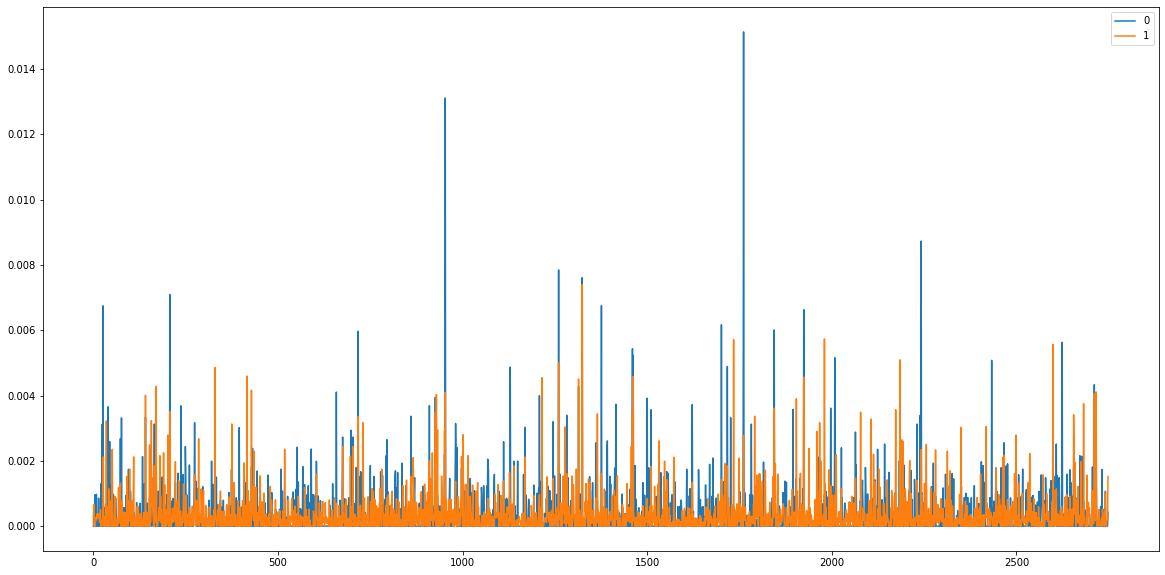

In [ ]:
std_NP.plot(kind="line", figsize=(20,10))

In [ ]:
# predict the new document from the testing dataset
t = time()
test_time_NP = time() - t
print("test time:  %0.3fs" % test_time_NP)

# compute the performance measures
score_NP = metrics.accuracy_score(y_test_NP, y_pred_NP)
print("accuracy:   %0.3f" % score_NP)
print(metrics.classification_report(y_test_NP, y_pred_NP))
# print(metrics.classification_report(y_test_NP, y_pred_NP,
#                                             target_names=['Positif', 'Negatif']))
print("confusion matrix:")
print(metrics.confusion_matrix(y_test_NP, y_pred_NP))
print('------------------------------')

test time:  0.000s
accuracy:   0.803
              precision    recall  f1-score   support

          -1       0.53      0.52      0.53        63
           1       0.87      0.88      0.88       237

    accuracy                           0.80       300
   macro avg       0.70      0.70      0.70       300
weighted avg       0.80      0.80      0.80       300

confusion matrix:
[[ 33  30]
 [ 29 208]]
------------------------------


In [ ]:
#Cross Validation For Gaussian Distribution
scores_acc_NP = cross_val_score(gnb_NP, X_train_NP, y_train_NP, cv=5, scoring="accuracy")
scores_acc_NP

array([0.71428571, 0.75      , 0.69285714, 0.69285714, 0.74285714])

In [ ]:
#Mean And Std For Gaussian Distribution
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_acc_NP.mean(), scores_acc_NP.std()))

0.72 accuracy with a standard deviation of 0.02


***Cross Validation (Data Per Iterasi)***

In [ ]:
def persenData_NP(datax):
  frame = pd.DataFrame(datax)
  rows, cols = [len(frame), len(frame.values[1])]
  labels_data = [] 
  for i in range(0, len(frame)):
    data_jum = len(frame.values[i])
    col = {
        "positif" : 0,
        "negatif" : 0,
    }
    positif = []
    negatif = []
    for j in range(0, data_jum):
      nilai_data = frame.values[i,j]
      angka = all_y_NP[nilai_data]
      if angka == 1:
        positif.append(angka)
      elif angka == -1:
        negatif.append(angka)
    total_positif = len(positif)
    total_negatif = len(negatif)
      
    col["positif"] = total_positif/data_jum * 100
    col["negatif"] = total_negatif/data_jum * 100 
    labels_data.append(col)
  return labels_data

In [ ]:
def getData_Tweet_NP(Sample_data, data_drop):
  main_data = Sample_data
  drop_data = data_drop
  tmp_all = []

  for i in range(0, len(drop_data)):
    # tmp = main_data.drop(drop_data[i])
    tmp = main_data.loc[drop_data[i], :]
    tmp_all.append(tmp)
  
  return tmp_all

In [ ]:
def getData_Label_NP(datax):
  tmp_frame = pd.DataFrame(datax)
  frame = tmp_frame.fillna(0)
  labels_data = [] 
  for i in range(0, len(frame)):
    data_jum = len(frame.values[i])
    tmp_label = []
    for j in range(0, data_jum):
      nilai_data = int(frame.values[i,j])
      angka = all_y_NP[nilai_data]
      tmp_label.append(angka)
      
    labels_data.append(tmp_label)
  return labels_data

  #Done Berhasil Return Index Data Menjadi Label

In [ ]:
all_X_NP = data_TFIDF
all_y_NP = label2

In [ ]:
kf_NP = KFold(n_splits=5)
kf_NP.get_n_splits(all_X_NP)
print(kf_NP)

KFold(n_splits=5, random_state=None, shuffle=False)


In [ ]:
scores_crossval_NP = cross_val_score(gnb_NP, all_X_NP, all_y_NP, cv=kf_NP,scoring="accuracy")
scores_crossval_NP

array([0.71 , 0.765, 0.755, 0.765, 0.685])

In [ ]:
scores_crossval_NP .mean()

0.736

In [ ]:
train_data_NP = []
test_data_NP = []
for train_index_NP, test_index_NP in kf_NP.split(all_X_NP):
  # print("TRAIN : ", train_index, "TEST: ", test_index)
  train_data_NP.append(train_index_NP)
  test_data_NP.append(test_index_NP)

In [ ]:
tmp_train_NP = pd.DataFrame(train_data_NP)
train_NP = tmp_train_NP.fillna(0)
train_NP = train_NP.astype(int)
train_NP

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799
0,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
1,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
2,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
3,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799


In [ ]:
tmp_test_NP = pd.DataFrame(test_data_NP)
test_NP = tmp_test_NP.fillna(0)
test_NP = test_NP.astype(int)
test_NP

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
1,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,...,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399
2,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,...,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599
3,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,...,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799
4,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999


In [ ]:
label_train_NP = getData_Label_NP(train_NP)
label_test_NP = getData_Label_NP(test_NP)

In [ ]:
DataBaru_train_NP = getData_Tweet_NP(all_X_NP, train_NP.to_numpy())
DataBaru_test_NP = getData_Tweet_NP(all_X_NP, test_NP.to_numpy())

In [ ]:
# X = Model Y = label
for i in range(0,5):
  gnb_NP = GaussianNB()
  gnb_NP.fit(DataBaru_train_NP[i], label_train_NP[i])
  y_pred_NP = gnb_NP.predict(DataBaru_test_NP[i])

  print("Data ke-" + str(i))
  # predict the new document from the testing dataset
  t = time()
  test_time_NP = time() - t
  print("test time:  %0.3fs" % test_time_NP)

  # compute the performance measures
  score_NP = metrics.accuracy_score(label_test_NP[i], y_pred_NP)
  print("accuracy:   %0.3f" % score_NP)
  print(metrics.classification_report(label_test_NP[i], y_pred_NP))
  # print(metrics.classification_report(label_test_NP[i], y_pred_NP,
  #                                           target_names=['Positif', 'Negatif']))
  print("confusion matrix:")
  print(metrics.confusion_matrix(label_test_NP[i], y_pred_NP))
  print('------------------------------')

Data ke-0
test time:  0.000s
accuracy:   0.710
              precision    recall  f1-score   support

          -1       0.46      0.49      0.47        53
           1       0.81      0.79      0.80       147

    accuracy                           0.71       200
   macro avg       0.63      0.64      0.64       200
weighted avg       0.72      0.71      0.71       200

confusion matrix:
[[ 26  27]
 [ 31 116]]
------------------------------
Data ke-1
test time:  0.000s
accuracy:   0.765
              precision    recall  f1-score   support

          -1       0.43      0.55      0.48        40
           1       0.88      0.82      0.85       160

    accuracy                           0.77       200
   macro avg       0.66      0.68      0.67       200
weighted avg       0.79      0.77      0.78       200

confusion matrix:
[[ 22  18]
 [ 29 131]]
------------------------------
Data ke-2
test time:  0.000s
accuracy:   0.755
              precision    recall  f1-score   support

      

In [ ]:
persen_train_NP = persenData_NP(train_data_NP)
persen_test_NP = persenData_NP(test_data_NP)

In [ ]:
train_df_NP = pd.DataFrame(persen_train_NP)
test_df_NP = pd.DataFrame(persen_test_NP)

df_concat_NP = pd.concat((train_df_NP, test_df_NP))

by_row_index_NP = df_concat_NP.groupby(df_concat_NP.index)
df_means_NP = by_row_index_NP.mean()
df_means_NP.head()

,positif,negatif
0,75.8125,24.1875
1,78.2500,21.7500
2,80.3125,19.6875
3,80.3125,19.6875
4,71.3125,28.6875


**End Of Data Negatif dan Positif**

***End Of Algoritma Naive Bayes***


---



***Visualisasi***

In [ ]:
DataWordCloud = pd.DataFrame({
    "Label" : label,
    "DataTweet" : TweetFix,
    "Len Data" : lenDataStem
})
# DataWordCloud

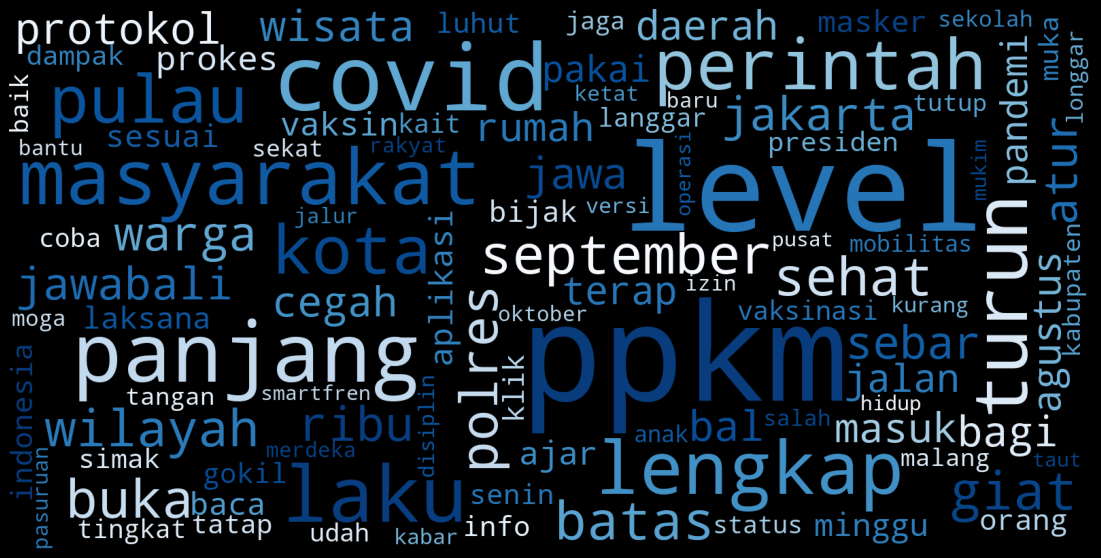

In [ ]:
DataWordCloud['DataTweet'] = DataWordCloud['DataTweet'].map(lambda x : " ".join(x))
allword = ' '.join([dt for dt in DataWordCloud['DataTweet']])
wc = WordCloud(colormap='Blues',width=1600,height=800,random_state=100,max_font_size=200,min_font_size=30,collocations=False).generate(allword)

plt.figure(figsize=(20,10),facecolor='k')
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
# dataWordCloud = WordCloud().process_text(allword)
# datawc = pd.DataFrame([dataWordCloud]).T
# datawc.nlargest(10,0)

***Upsampling***

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled_NNP, y_resampled_NNP = SMOTE(random_state=0).fit_resample(data_TFIDF, label)

In [ ]:
def persenData_re_NNP(datax):
  tmp_frame = pd.DataFrame(datax)
  # frame = tmp_frame.fillna(value=np.random.randint(0,len(datax)))
  frame = tmp_frame.fillna(0)
  rows, cols = [len(frame), len(frame.values[1])]
  labels_data = [] 
  for i in range(0, len(frame)):
    data_jum = len(frame.values[i])
    col = {
        "positif" : 0,
        "negatif" : 0,
        "netral" : 0,
    }
    positif = []
    negatif = []
    netral = []
    for j in range(0, data_jum):
      nilai_data = int(frame.values[i,j])
      angka = all_y_re_NNP[nilai_data]
      if angka == 1:
        positif.append(angka)
      elif angka == -1:
        negatif.append(angka)
      elif angka == 0:
        netral.append(angka)
    total_positif = len(positif)
    total_negatif = len(negatif)
    total_netral = len(netral)
      
    col["positif"] = total_positif/data_jum * 100
    col["negatif"] = total_negatif/data_jum * 100 
    col["netral"] = total_netral/data_jum * 100 
    labels_data.append(col)
  return labels_data

In [ ]:
def getData_Tweet_re_NNP(Sample_data, data_drop):
  main_data = Sample_data
  drop_data = data_drop
  tmp_all = []

  for i in range(0, len(drop_data)):
    # tmp = main_data.drop(drop_data[i])
    tmp = main_data.loc[drop_data[i], :]
    tmp_all.append(tmp)
  
  return tmp_all

In [ ]:
def getData_Label_re_NNP(datax):
  tmp_frame = pd.DataFrame(datax)
  frame = tmp_frame.fillna(0)
  labels_data = [] 
  for i in range(0, len(frame)):
    data_jum = len(frame.values[i])
    tmp_label = []
    for j in range(0, data_jum):
      nilai_data = int(frame.values[i,j])
      angka = all_y_re_NNP[nilai_data]
      tmp_label.append(angka)
      
    labels_data.append(tmp_label)
  return labels_data

  #Done Berhasil Return Index Data Menjadi Label

In [ ]:
X_train_re_NNP, X_test_re_NNP, y_train_re_NNP, y_test_re_NNP = train_test_split(X_resampled_NNP, y_resampled_NNP, test_size=0.3, random_state=606) 
# 70% training and 30% testing

In [ ]:
gnb_re_NNP = GaussianNB()
gnb_re_NNP.fit(X_train_re_NNP, y_train_re_NNP)
y_pred_re_NNP = gnb_re_NNP.predict(X_test_re_NNP)

In [ ]:
#Mean
mean_re_NNP = pd.DataFrame(gnb_re_NNP.theta_).T
mean_re_NNP

,0,1,2
0,0.000000,0.000000,0.000000
1,0.002504,0.003083,0.001140
2,0.000000,0.000000,0.001106
3,0.000000,0.000000,0.000660
4,0.002562,0.000000,0.000000
...,...,...,...
2744,0.000000,0.000000,0.000876
2745,0.000000,0.001037,0.000000
2746,0.000000,0.001037,0.000000
2747,0.000000,0.001037,0.000000


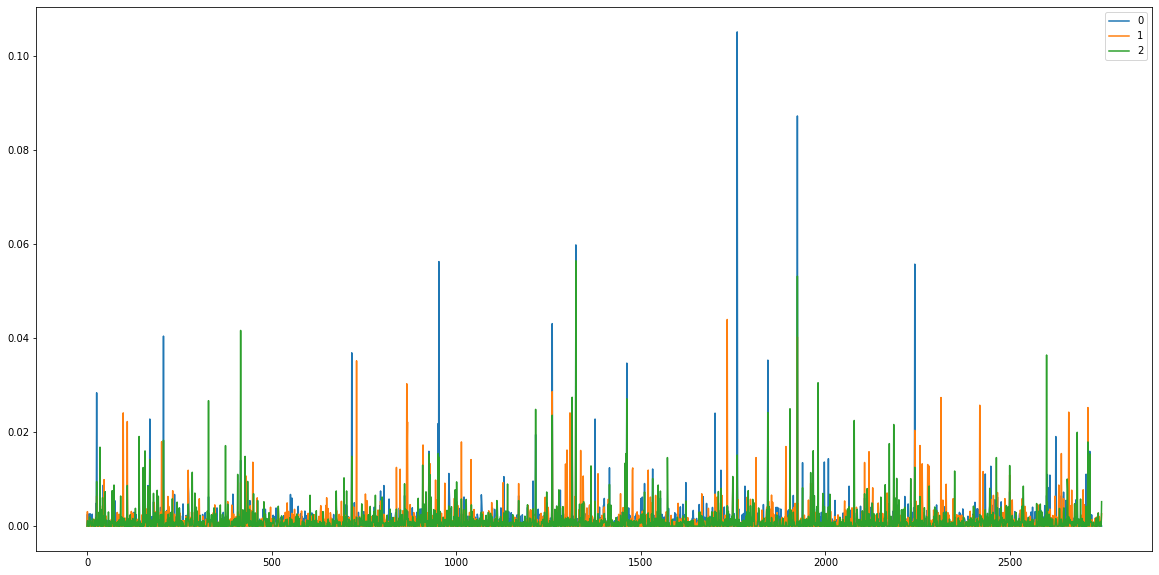

In [ ]:
mean_re_NNP.plot(kind="line", figsize=(20,10))

In [ ]:
#Standar Deviasi
std_re_NNP = pd.DataFrame(gnb_re_NNP.sigma_).T
std_re_NNP

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


,0,1,2
0,9.171544e-12,9.171544e-12,9.171544e-12
1,6.996819e-04,1.046151e-03,5.013641e-04
2,9.171544e-12,9.171544e-12,4.717982e-04
3,9.171544e-12,9.171544e-12,1.681134e-04
4,7.813681e-04,9.171544e-12,9.171544e-12
...,...,...,...
2744,9.171544e-12,9.171544e-12,2.964630e-04
2745,9.171544e-12,2.668167e-04,9.171544e-12
2746,9.171544e-12,2.668167e-04,9.171544e-12
2747,9.171544e-12,2.668167e-04,9.171544e-12


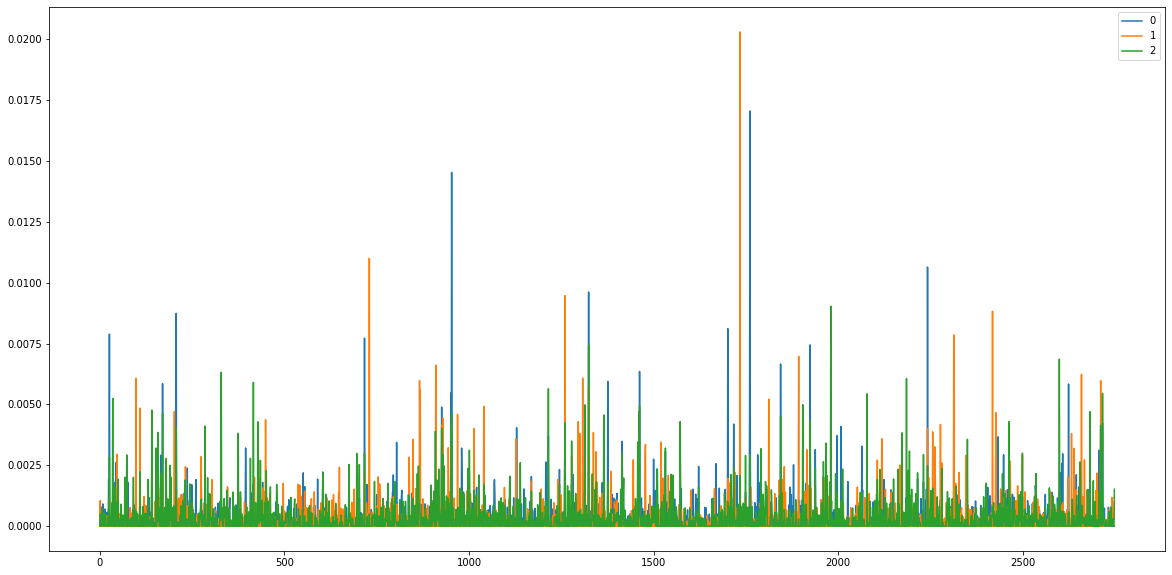

In [ ]:
std_re_NNP.plot(kind="line", figsize=(20,10))

In [ ]:
# predict the new document from the testing dataset
t = time()
test_time_re_NNP = time() - t
print("test time:  %0.3fs" % test_time_re_NNP)

# compute the performance measures
score_re_NNP = metrics.accuracy_score(y_test_re_NNP, y_pred_re_NNP)
print("accuracy:   %0.3f" % score_re_NNP)
print(metrics.classification_report(y_test_re_NNP, y_pred_re_NNP))
# print(metrics.classification_report(y_test_re_NNP, y_pred_re_NNP,
#                                             target_names=['Positif', 'Negatif', 'Netral']))
print("confusion matrix:")
print(metrics.confusion_matrix(y_test_re_NNP, y_pred_re_NNP))
print('------------------------------')

test time:  0.000s
accuracy:   0.849
              precision    recall  f1-score   support

          -1       0.80      0.96      0.87       176
           0       0.86      0.95      0.90       156
           1       0.93      0.64      0.76       166

    accuracy                           0.85       498
   macro avg       0.86      0.85      0.84       498
weighted avg       0.86      0.85      0.84       498

confusion matrix:
[[169   2   5]
 [  5 148   3]
 [ 37  23 106]]
------------------------------


In [ ]:
#Cross Validation For Gaussian Distribution
scores_acc_re_NNP = cross_val_score(gnb_re_NNP, X_train_re_NNP, y_train_re_NNP, cv=5, scoring="accuracy")
scores_acc_re_NNP

array([0.79399142, 0.83189655, 0.82758621, 0.8362069 , 0.76293103])

In [ ]:
#Mean And Std For Gaussian Distribution
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_acc_re_NNP.mean(), scores_acc_re_NNP.std()))

0.81 accuracy with a standard deviation of 0.03


In [ ]:
all_X_re_NNP = X_resampled_NNP
all_y_re_NNP = y_resampled_NNP

In [ ]:
kf_re_NNP = KFold(n_splits=5, random_state = 1,shuffle=True)
kf_re_NNP.get_n_splits(all_X_re_NNP)
print(kf_re_NNP)

KFold(n_splits=5, random_state=1, shuffle=True)


In [ ]:
scores_cross_re_NNP = cross_val_score(gnb_re_NNP, all_X_re_NNP, all_y_re_NNP, cv=kf_re_NNP,scoring="accuracy")
scores_cross_re_NNP

array([0.87349398, 0.8373494 , 0.8373494 , 0.84036145, 0.83685801])

In [ ]:
scores_cross_re_NNP.mean()

0.8450824445819531

In [ ]:
train_data_re_NNP = []
test_data_re_NNP = []
for train_index_re_NNP, test_index_re_NNP in kf_re_NNP.split(all_X_re_NNP):
  # print("TRAIN : ", train_index, "TEST: ", test_index)
  train_data_re_NNP.append(train_index_re_NNP)
  test_data_re_NNP.append(test_index_re_NNP)

In [ ]:
tmp_train_re_NNP = pd.DataFrame(train_data_re_NNP)
train_re_NNP = tmp_train_re_NNP.fillna(0)
train_re_NNP = train_re_NNP.astype(int)
train_re_NNP

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1288,1289,1290,1291,1292,1293,1294,1295,1296,1297,1298,1299,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309,1310,1311,1312,1313,1314,1315,1316,1317,1318,1319,1320,1321,1322,1323,1324,1325,1326,1327
0,1,2,4,5,6,7,9,10,11,12,13,14,15,16,17,18,20,21,23,24,25,26,27,28,29,31,32,33,34,35,36,38,39,40,41,42,43,44,45,46,...,1607,1608,1609,1613,1614,1615,1616,1617,1619,1620,1622,1624,1625,1626,1627,1628,1629,1630,1632,1633,1634,1635,1637,1638,1639,1640,1641,1644,1646,1647,1648,1649,1650,1651,1654,1655,1656,1657,1658,0
1,0,1,2,3,4,5,7,8,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,28,29,30,31,32,33,36,37,38,39,40,42,43,44,46,...,1611,1612,1614,1616,1617,1618,1619,1620,1621,1622,1623,1624,1625,1626,1627,1629,1630,1631,1632,1633,1635,1636,1638,1639,1640,1641,1642,1643,1645,1646,1647,1650,1651,1652,1653,1654,1655,1657,1658,0
2,0,3,4,6,7,8,12,14,15,18,19,20,21,22,24,25,27,28,29,30,33,34,35,36,37,40,41,42,43,44,45,46,47,48,49,51,52,53,55,56,...,1612,1613,1615,1618,1619,1621,1622,1623,1624,1625,1627,1628,1630,1631,1632,1633,1634,1635,1636,1637,1638,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1651,1652,1653,1654,1655,1656,1657,1658,0
3,0,1,2,3,5,6,8,9,10,11,12,13,15,16,17,19,20,21,22,23,24,25,26,27,30,31,32,34,35,37,38,39,41,43,44,45,47,48,49,50,...,1609,1610,1611,1612,1613,1614,1615,1616,1617,1618,1619,1620,1621,1623,1625,1626,1627,1628,1629,1631,1633,1634,1635,1636,1637,1639,1642,1643,1644,1645,1648,1649,1650,1652,1653,1654,1656,1657,1658,0
4,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18,19,22,23,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,45,46,...,1611,1612,1613,1614,1615,1616,1617,1618,1620,1621,1622,1623,1624,1626,1628,1629,1630,1631,1632,1634,1636,1637,1638,1639,1640,1641,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1655,1656


In [ ]:
tmp_test_re_NNP = pd.DataFrame(test_data_re_NNP)
test_re_NNP = tmp_test_re_NNP.fillna(0)
test_re_NNP = test_re_NNP.astype(int)
test_re_NNP

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331
0,0,3,8,19,22,30,37,48,49,51,53,58,60,65,75,80,88,91,94,101,102,104,107,108,111,115,119,126,140,158,161,167,169,177,181,190,194,201,202,204,...,1446,1457,1463,1469,1481,1485,1492,1498,1511,1512,1518,1520,1523,1533,1540,1543,1545,1546,1554,1556,1565,1572,1574,1575,1577,1600,1604,1610,1611,1612,1618,1621,1623,1631,1636,1642,1643,1645,1652,1653
1,6,12,27,34,35,41,45,47,56,62,67,73,76,78,81,82,83,85,87,90,98,99,120,131,133,135,142,146,148,154,156,159,163,180,186,188,189,192,195,198,...,1435,1440,1443,1452,1455,1459,1464,1472,1476,1477,1479,1503,1505,1506,1510,1515,1517,1519,1522,1530,1534,1553,1560,1566,1576,1581,1583,1586,1588,1592,1597,1613,1615,1628,1634,1637,1644,1648,1649,1656
2,1,2,5,9,10,11,13,16,17,23,26,31,32,38,39,50,54,59,64,69,72,74,84,89,97,103,106,110,117,121,125,134,136,137,139,151,160,164,165,172,...,1456,1458,1461,1462,1465,1466,1475,1480,1482,1484,1486,1488,1494,1496,1501,1504,1507,1508,1521,1541,1547,1551,1552,1559,1561,1562,1568,1579,1589,1594,1603,1608,1614,1616,1617,1620,1626,1629,1639,1650
3,4,7,14,18,28,29,33,36,40,42,46,52,57,61,66,68,70,71,92,93,95,105,112,113,114,116,118,122,124,127,128,132,147,153,157,162,168,173,179,184,...,1468,1470,1471,1473,1474,1483,1489,1497,1524,1528,1536,1537,1539,1542,1549,1550,1555,1563,1567,1570,1571,1578,1584,1590,1591,1593,1596,1598,1605,1622,1624,1630,1632,1638,1640,1641,1646,1647,1651,1655
4,15,20,21,24,25,43,44,55,63,77,79,86,96,100,109,123,129,130,138,141,143,144,145,149,150,152,155,166,170,171,174,176,182,183,196,199,206,209,210,219,...,1502,1509,1513,1514,1516,1525,1526,1527,1529,1531,1532,1535,1538,1544,1548,1557,1558,1564,1569,1573,1580,1582,1585,1587,1595,1599,1601,1602,1606,1607,1609,1619,1625,1627,1633,1635,1654,1657,1658,0


In [ ]:
label_train_re_NNP = getData_Label_re_NNP(train_re_NNP)
label_test_re_NNP = getData_Label_re_NNP(test_re_NNP)

In [ ]:
DataBaru_train_re_NNP = getData_Tweet_re_NNP(X_resampled_NNP, train_re_NNP.to_numpy())
DataBaru_test_re_NNP = getData_Tweet_re_NNP(X_resampled_NNP, test_re_NNP.to_numpy())

In [ ]:
# X = Model Y = label
for i in range(0,5):
  gnb_re_NNP = GaussianNB()
  gnb_re_NNP.fit(DataBaru_train_re_NNP[i], label_train_re_NNP[i])
  y_pred_re_NNP = gnb_re_NNP.predict(DataBaru_test_re_NNP[i])

  print("Data ke-" + str(i))
  # predict the new document from the testing dataset
  t = time()
  test_time_re_NNP = time() - t
  print("test time:  %0.3fs" % test_time_re_NNP)

  # compute the performance measures
  score_re_NNP = metrics.accuracy_score(label_test_re_NNP[i], y_pred_re_NNP)
  print("accuracy:   %0.3f" % score_re_NNP)
  print(metrics.classification_report(label_test_re_NNP[i], y_pred_re_NNP))
    # print(metrics.classification_report(label_test_re_NNP[i], y_pred_re_NNP,
    #                                           target_names=['Positif', 'Negatif', 'Netral']))
  print("confusion matrix:")
  print(metrics.confusion_matrix(label_test_re_NNP[i], y_pred_re_NNP))
  print('------------------------------')

Data ke-0
test time:  0.000s
accuracy:   0.873
              precision    recall  f1-score   support

          -1       0.79      0.96      0.87       104
           0       0.93      0.96      0.94       123
           1       0.91      0.69      0.78       105

    accuracy                           0.87       332
   macro avg       0.88      0.87      0.87       332
weighted avg       0.88      0.87      0.87       332

confusion matrix:
[[100   0   4]
 [  2 118   3]
 [ 24   9  72]]
------------------------------
Data ke-1
test time:  0.000s
accuracy:   0.837
              precision    recall  f1-score   support

          -1       0.77      0.94      0.85       114
           0       0.89      0.98      0.93       110
           1       0.89      0.58      0.70       108

    accuracy                           0.84       332
   macro avg       0.85      0.83      0.83       332
weighted avg       0.85      0.84      0.83       332

confusion matrix:
[[107   0   7]
 [  1 108   1]
 

In [ ]:
persen_train_re_NNP = persenData_re_NNP(train_data_re_NNP)
persen_test_re_NNP = persenData_re_NNP(test_data_re_NNP)

In [ ]:
train_df_re_NNP = pd.DataFrame(persen_train_re_NNP)
test_df_re_NNP = pd.DataFrame(persen_test_re_NNP)

df_concat_re_NNP = pd.concat((train_df_re_NNP, test_df_re_NNP))

by_row_index_re_NNP = df_concat_re_NNP.groupby(df_concat_re_NNP.index)
df_means_re_NNP = by_row_index_re_NNP.mean()
df_means_re_NNP.head()

,positif,negatif,netral
0,32.680723,32.605422,34.713855
1,33.019578,33.734940,33.245482
2,34.375000,34.299699,31.325301
3,33.584337,33.283133,33.132530
4,32.906627,32.944277,34.149096


***Positif & Negatif***

In [ ]:
def persenData_re_NP(datax):
  tmp_frame = pd.DataFrame(datax)
  # frame = tmp_frame.fillna(value=np.random.randint(0,len(datax)))
  frame = tmp_frame.fillna(0)
  rows, cols = [len(frame), len(frame.values[1])]
  labels_data = [] 
  for i in range(0, len(frame)):
    data_jum = len(frame.values[i])
    col = {
        "positif" : 0,
        "negatif" : 0,
    }
    positif = []
    negatif = []
    for j in range(0, data_jum):
      nilai_data = int(frame.values[i,j])
      angka = all_y_re_NP[nilai_data]
      if angka == 1:
        positif.append(angka)
      elif angka == -1:
        negatif.append(angka)
    total_positif = len(positif)
    total_negatif = len(negatif)
      
    col["positif"] = total_positif/data_jum * 100
    col["negatif"] = total_negatif/data_jum * 100 
    labels_data.append(col)
  return labels_data

In [ ]:
def getData_Tweet_re_NP(Sample_data, data_drop):
  main_data = Sample_data
  drop_data = data_drop
  tmp_all = []

  for i in range(0, len(drop_data)):
    # tmp = main_data.drop(drop_data[i])
    tmp = main_data.loc[drop_data[i], :]
    tmp_all.append(tmp)
  
  return tmp_all

In [ ]:
def getData_Label_re_NP(datax):
  tmp_frame = pd.DataFrame(datax)
  frame = tmp_frame.fillna(0)
  labels_data = [] 
  for i in range(0, len(frame)):
    data_jum = len(frame.values[i])
    tmp_label = []
    for j in range(0, data_jum):
      nilai_data = int(frame.values[i,j])
      angka = all_y_re_NP[nilai_data]
      tmp_label.append(angka)
      
    labels_data.append(tmp_label)
  return labels_data

  #Done Berhasil Return Index Data Menjadi Label

In [ ]:
X_resampled_NP, y_resampled_NP = SMOTE(random_state=0).fit_resample(data_TFIDF, label2)

In [ ]:
X_train_re_NP, X_test_re_NP, y_train_re_NP, y_test_re_NP = train_test_split(X_resampled_NP, y_resampled_NP, test_size=0.3, random_state=606) 
# 70% training and 30% testing

In [ ]:
gnb_re_NP = GaussianNB()
gnb_re_NP.fit(X_train_re_NP, y_train_re_NP)
y_pred_re_NP = gnb_re_NP.predict(X_test_re_NP)

In [ ]:
mean_re_NP = pd.DataFrame(gnb_re_NP.theta_).T #Mean
mean_re_NP

,0,1
0,0.000000,0.000000
1,0.002031,0.001576
2,0.000000,0.000800
3,0.000000,0.000477
4,0.001532,0.000000
...,...,...
2744,0.000000,0.000000
2745,0.000000,0.000579
2746,0.000000,0.000579
2747,0.000000,0.000579


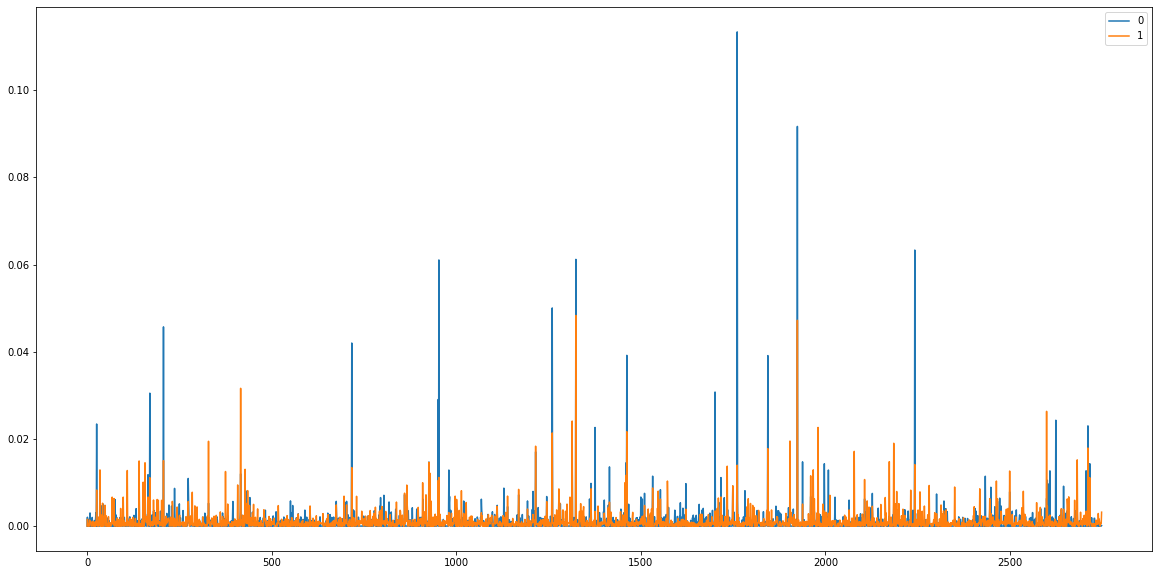

In [ ]:
mean_re_NP.plot(kind="line", figsize=(20,10))

In [ ]:
#Standar Deviasi
std_re_NP = pd.DataFrame(gnb_re_NP.sigma_).T
std_re_NP

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


,0,1
0,1.304103e-11,1.304103e-11
1,4.882420e-04,6.636883e-04
2,1.304103e-11,3.415267e-04
3,1.304103e-11,1.216944e-04
4,4.496986e-04,1.304103e-11
...,...,...
2744,1.304103e-11,1.304103e-11
2745,1.304103e-11,1.791357e-04
2746,1.304103e-11,1.791357e-04
2747,1.304103e-11,1.791357e-04


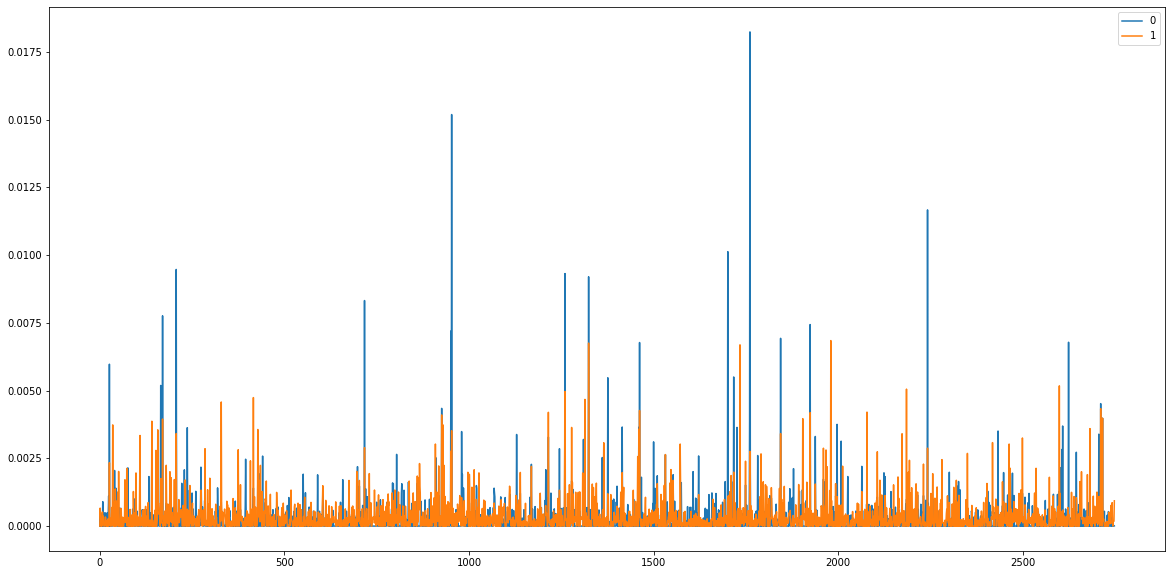

In [ ]:
std_re_NP.plot(kind="line", figsize=(20,10))

In [ ]:
# predict the new document from the testing dataset
t = time()
test_time_re_NP = time() - t
print("test time:  %0.3fs" % test_time_re_NP)

# compute the performance measures
score_re_NP = metrics.accuracy_score(y_test_re_NP, y_pred_re_NP)
print("accuracy:   %0.3f" % score_re_NP)
# print(metrics.classification_report(y_test_re_NP, y_pred_re_NP,
#                                             target_names=['Positif', 'Negatif']))
print(metrics.classification_report(y_test_re_NP, y_pred_re_NP))
print("confusion matrix:")
print(metrics.confusion_matrix(y_test_re_NP, y_pred_re_NP))
print('------------------------------')

test time:  0.000s
accuracy:   0.869
              precision    recall  f1-score   support

          -1       0.79      1.00      0.88       227
           1       0.99      0.75      0.85       237

    accuracy                           0.87       464
   macro avg       0.89      0.87      0.87       464
weighted avg       0.89      0.87      0.87       464

confusion matrix:
[[226   1]
 [ 60 177]]
------------------------------


In [ ]:
#Cross Validation For Gaussian Distribution
scores_acc_re_NP = cross_val_score(gnb_re_NP, X_train_re_NP, y_train_re_NP, cv=5, scoring="accuracy")
scores_acc_re_NP

array([0.87962963, 0.87962963, 0.80555556, 0.85648148, 0.85185185])

In [ ]:
#Mean And Std For Gaussian Distribution
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores_acc_re_NP.mean(), scores_acc_re_NP.std()))

0.85 accuracy with a standard deviation of 0.03


In [ ]:
all_X_re_NP = X_resampled_NP
all_y_re_NP = y_resampled_NP

In [ ]:
kf_re_NP = KFold(n_splits=5, shuffle=True)
kf_re_NP.get_n_splits(all_X_re_NP)
print(kf_re_NP)

KFold(n_splits=5, random_state=None, shuffle=True)


In [ ]:
scores_cross_re_NP = cross_val_score(gnb_re_NP, all_X_re_NP, all_y_re_NP, cv=kf_NP,scoring="accuracy")
scores_cross_re_NP

array([0.76699029, 0.81877023, 0.81877023, 0.94822006, 1.        ])

In [ ]:
scores_cross_re_NP.mean()

0.8705501618122977

In [ ]:
train_data_re_NP = []
test_data_re_NP = []
for train_index_re_NP, test_index_re_NP in kf_re_NP.split(all_X_re_NP):
  # print("TRAIN : ", train_index, "TEST: ", test_index)
  train_data_re_NP.append(train_index_re_NP)
  test_data_re_NP.append(test_index_re_NP)

In [ ]:
tmp_train_re_NP = pd.DataFrame(train_data_re_NP)
train_re_NP = tmp_train_re_NP.fillna(0)
train_re_NP = train_re_NP.astype(int)
train_re_NP

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1196,1197,1198,1199,1200,1201,1202,1203,1204,1205,1206,1207,1208,1209,1210,1211,1212,1213,1214,1215,1216,1217,1218,1219,1220,1221,1222,1223,1224,1225,1226,1227,1228,1229,1230,1231,1232,1233,1234,1235
0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,...,1491,1493,1494,1495,1496,1497,1498,1500,1502,1504,1506,1507,1508,1510,1511,1512,1513,1514,1515,1516,1517,1518,1519,1521,1522,1524,1526,1527,1528,1530,1533,1534,1535,1537,1538,1539,1540,1542,1543,0
1,0,1,3,5,6,8,9,10,12,13,15,17,18,19,20,22,24,25,26,27,28,29,30,32,33,36,37,38,41,43,44,45,46,48,49,50,51,52,54,55,...,1498,1499,1500,1501,1502,1503,1504,1505,1506,1507,1508,1509,1510,1512,1513,1514,1515,1516,1517,1519,1520,1522,1523,1525,1526,1528,1529,1530,1531,1532,1533,1535,1536,1537,1538,1540,1541,1542,1543,0
2,0,2,3,4,5,7,9,11,12,14,15,16,17,19,21,23,24,25,26,28,29,30,31,32,34,35,36,37,39,40,42,43,44,45,46,47,48,50,51,52,...,1496,1497,1498,1499,1500,1501,1503,1504,1505,1506,1507,1509,1510,1511,1512,1514,1516,1517,1518,1520,1521,1522,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1534,1536,1537,1539,1541,1542,1543,0
3,0,1,2,3,4,6,7,8,9,10,11,13,14,15,16,17,18,20,21,22,23,26,27,31,32,33,34,35,37,38,39,40,41,42,44,45,46,47,49,50,...,1493,1494,1496,1498,1499,1500,1501,1502,1503,1504,1505,1508,1509,1511,1512,1513,1515,1518,1519,1520,1521,1523,1524,1525,1526,1527,1528,1529,1530,1531,1532,1533,1534,1535,1536,1538,1539,1540,1541,0
4,0,1,2,4,5,6,7,8,10,11,12,13,14,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,38,39,40,41,42,43,46,...,1497,1499,1501,1502,1503,1505,1506,1507,1508,1509,1510,1511,1513,1514,1515,1516,1517,1518,1519,1520,1521,1522,1523,1524,1525,1527,1529,1531,1532,1533,1534,1535,1536,1537,1538,1539,1540,1541,1542,1543


In [ ]:
tmp_test_re_NP = pd.DataFrame(test_data_re_NP)
test_re_NP = tmp_test_re_NP.fillna(0)
test_re_NP = test_re_NP.astype(int)
test_re_NP

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308
0,0,17,26,46,50,52,58,63,64,66,79,91,94,96,107,109,113,121,126,131,140,141,142,147,148,152,153,159,167,175,181,186,189,191,196,200,205,210,211,216,...,1373,1375,1378,1383,1388,1389,1403,1406,1415,1417,1422,1423,1428,1430,1435,1436,1438,1451,1453,1461,1466,1471,1474,1487,1489,1490,1492,1499,1501,1503,1505,1509,1520,1523,1525,1529,1531,1532,1536,1541
1,2,4,7,11,14,16,21,23,31,34,35,39,40,42,47,53,74,78,81,84,86,111,117,129,132,136,143,146,149,158,160,172,173,176,187,195,197,198,201,203,...,1352,1353,1354,1355,1360,1365,1370,1371,1372,1381,1384,1387,1396,1401,1404,1405,1408,1420,1426,1429,1441,1442,1443,1445,1464,1465,1473,1483,1484,1486,1491,1494,1496,1511,1518,1521,1524,1527,1534,1539
2,1,6,8,10,13,18,20,22,27,33,38,41,49,55,57,62,65,67,68,70,72,73,77,80,90,93,95,97,102,104,106,110,112,115,127,130,133,138,144,145,...,1340,1343,1346,1348,1349,1357,1369,1380,1382,1385,1391,1392,1394,1395,1414,1416,1418,1425,1434,1446,1447,1452,1454,1455,1456,1460,1462,1470,1477,1480,1488,1502,1508,1513,1515,1519,1533,1535,1538,1540
3,5,12,19,24,25,28,29,30,36,43,48,54,56,76,83,92,98,99,100,101,114,123,134,150,154,156,161,163,169,171,177,180,185,190,199,202,212,213,220,225,...,1350,1362,1366,1368,1374,1379,1386,1390,1393,1397,1398,1399,1400,1407,1409,1419,1421,1427,1431,1440,1448,1450,1472,1475,1478,1479,1481,1482,1495,1497,1506,1507,1510,1514,1516,1517,1522,1537,1542,1543
4,3,9,15,32,37,44,45,51,59,60,61,69,71,75,82,85,87,88,89,103,105,108,116,118,119,120,122,124,125,128,135,137,139,162,164,166,168,182,204,206,...,1333,1334,1338,1341,1351,1356,1363,1367,1376,1377,1402,1410,1411,1412,1413,1424,1432,1433,1437,1439,1444,1449,1457,1458,1459,1463,1467,1468,1469,1476,1485,1493,1498,1500,1504,1512,1526,1528,1530,0


In [ ]:
label_train_re_NP = getData_Label_re_NP(train_re_NP)
label_test_re_NP = getData_Label_re_NP(test_re_NP)

In [ ]:
DataBaru_train_re_NP = getData_Tweet_re_NP(X_resampled_NP, train_re_NP.to_numpy())
DataBaru_test_re_NP = getData_Tweet_re_NP(X_resampled_NP, test_re_NP.to_numpy())

In [ ]:
# X = Model Y = label
for i in range(0,5):
  gnb_re_NP = GaussianNB()
  gnb_re_NP.fit(DataBaru_train_re_NP[i], label_train_re_NP[i])
  y_pred_re_NP = gnb_re_NP.predict(DataBaru_test_re_NP[i])

  print("Data ke-" + str(i))
  # predict the new document from the testing dataset
  t = time()
  test_time_re_NP = time() - t
  print("test time:  %0.3fs" % test_time_re_NP)

  # compute the performance measures
  score_re_NP = metrics.accuracy_score(label_test_re_NP[i], y_pred_re_NP)
  print("accuracy:   %0.3f" % score_re_NP)
  print(metrics.classification_report(label_test_re_NP[i], y_pred_re_NP))
  # print(metrics.classification_report(label_test_re_NP[i], y_pred_re_NP,
  #                                           target_names=['Positif', 'Negatif']))
  print("confusion matrix:")
  print(metrics.confusion_matrix(label_test_re_NP[i], y_pred_re_NP))
  print('------------------------------')

Data ke-0
test time:  0.000s
accuracy:   0.896
              precision    recall  f1-score   support

          -1       0.82      1.00      0.90       150
           1       1.00      0.80      0.89       159

    accuracy                           0.90       309
   macro avg       0.91      0.90      0.90       309
weighted avg       0.91      0.90      0.90       309

confusion matrix:
[[150   0]
 [ 32 127]]
------------------------------
Data ke-1
test time:  0.000s
accuracy:   0.880
              precision    recall  f1-score   support

          -1       0.81      0.99      0.89       156
           1       0.98      0.77      0.86       153

    accuracy                           0.88       309
   macro avg       0.90      0.88      0.88       309
weighted avg       0.90      0.88      0.88       309

confusion matrix:
[[154   2]
 [ 35 118]]
------------------------------
Data ke-2
test time:  0.000s
accuracy:   0.890
              precision    recall  f1-score   support

      

In [ ]:
persen_train_re_NP = persenData_re_NP(train_data_re_NP)
persen_test_re_NP = persenData_re_NP(test_data_re_NP)

In [ ]:
train_df_re_NP = pd.DataFrame(persen_train_re_NP)
test_df_re_NP = pd.DataFrame(persen_test_re_NP)

df_concat_re_NP = pd.concat((train_df_re_NP, test_df_re_NP))

by_row_index_re_NP = df_concat_re_NP.groupby(df_concat_re_NP.index)
df_means_re_NP = by_row_index_re_NP.mean()
df_means_re_NP.head()

,positif,negatif
0,50.525890,49.474110
1,49.797735,50.202265
2,50.161812,49.838188
3,49.433657,50.566343
4,49.919094,50.080906
